NameError: name 'sns' is not defined

In [140]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, inaugural
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


import matplotlib.pyplot as plt

# CORPORA NLTK


In [22]:

#IMPORT BROWN QUE TEM VÁRIOS ARQUIVOS.
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\AmandaRangel\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

## Importando o corpus

In [23]:
arquivos = gutenberg.fileids() #DENTRO DE GUTENBERG QUAIS SÃO OS ARQUIVOS DISPONÍVEIS
print(arquivos) 

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [24]:
#importando o texto
texto = gutenberg.raw('melville-moby_dick.txt')

#tokenização
tokens = nltk.word_tokenize(texto)

In [25]:
type(tokens)

list

## Análise de frequência


In [31]:
frequencia_distribuicao = FreqDist(tokens)
frequencia_distribuicao.most_common(20)
print("Frequencia de distribuição das 20 palavras mais comuns: ", frequencia_distribuicao.most_common(20))

#ficou apenas as palvras que não tem tanto sentido

Frequencia de distribuição das 20 palavras mais comuns:  [(',', 19204), ('the', 13715), ('.', 7306), ('of', 6513), ('and', 6010), ('a', 4545), ('to', 4515), (';', 4173), ('in', 3908), ('that', 2978), ('his', 2459), ('it', 2196), ('I', 2113), ('!', 1767), ('is', 1722), ('--', 1713), ('with', 1659), ('he', 1658), ('was', 1639), ('as', 1620)]


In [32]:
#retirar as stop words
stop_words = set(stopwords.words('english'))
#cria uma lista com os tokens sem as stop-words
tokens_ssw = [token for token in tokens if token.lower() not in stop_words]
type(tokens_ssw)

list

In [33]:
#como agora os tokens estão sem stop-words vou tentar ver dnv a frequência, apesar de ser lista não esta funcionando
frequencia_distribuicao = FreqDist(tokens_ssw)

print("Frequencia de distribuição das 20 palavras mais comuns sem stop-words: ", frequencia_distribuicao.most_common(20))


Frequencia de distribuição das 20 palavras mais comuns sem stop-words:  [(',', 19204), ('.', 7306), (';', 4173), ('!', 1767), ('--', 1713), ("''", 1615), ("'s", 1585), ('``', 1456), ('?', 1004), ('one', 880), ('whale', 782), ('like', 558), ('upon', 537), ('Ahab', 498), ('man', 472), ('ship', 454), ('old', 429), ('ye', 427), ('would', 425), ('sea', 365)]


In [34]:
#como ainda tem muitos pontos então decidi deixar apenas os alphanumerics
tokens_sem_pontuacao = [tokens for tokens in tokens_ssw if tokens.isalpha()]

In [92]:
frequencia_distribuicao = FreqDist(tokens_sem_pontuacao)

print("Frequencia de distribuição das 20 palavras mais comuns: ", frequencia_distribuicao.most_common(30))

Frequencia de distribuição das 20 palavras mais comuns:  [('one', 880), ('whale', 782), ('like', 558), ('upon', 537), ('Ahab', 498), ('man', 472), ('ship', 454), ('old', 429), ('ye', 427), ('would', 425), ('sea', 365), ('though', 335), ('time', 316), ('long', 305), ('said', 302), ('still', 299), ('yet', 299), ('great', 290), ('must', 283), ('seemed', 283), ('boat', 281), ('two', 275), ('last', 275), ('head', 270), ('Whale', 270), ('way', 262), ('Queequeg', 252), ('Stubb', 252), ('see', 250), ('little', 247)]


In [113]:
frequencia_distribuicao = dict(frequencia_distribuicao)


In [114]:
indice = ["A"]
df = pd.DataFrame(frequencia_distribuicao, index = indice)

In [115]:
df = df.transpose()

In [116]:
df.reset_index(inplace=True)

In [117]:
df.rename(columns ={"index":"palavra", "A":"frequencia"}, inplace=True)

In [118]:
df.iloc[0:10]

,palavra,frequencia
0,Moby,82
1,Dick,82
2,Herman,1
3,Melville,1
4,ETYMOLOGY,1
5,Supplied,2
6,Late,1
7,Consumptive,1
8,Usher,2
9,Grammar,2


In [124]:
df.sort_values(by="frequencia", ascending=False, inplace=True)

<Axes: xlabel='palavra', ylabel='frequencia'>

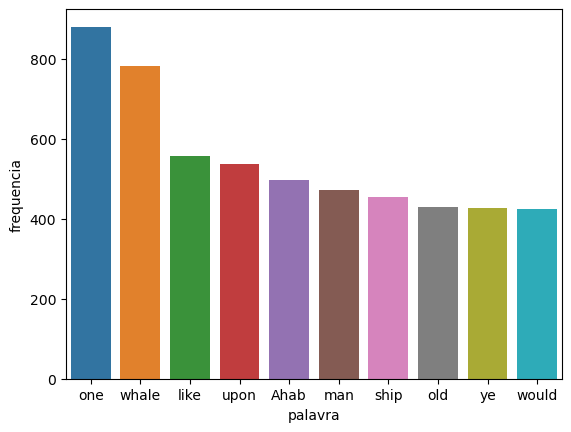

In [133]:
sns.barplot(x=df.iloc[0:10].palavra, y=df.iloc[0:10].frequencia)

## Análise de colocação

In [138]:
#identificação dos bigramas(duas palavras que aparecem juntas com certa frequência)
finder = BigramCollocationFinder.from_words(tokens_sem_pontuacao)


bigramas_associacao = finder.score_ngrams(BigramAssocMeasures.likelihood_ratio)

print("Bigramas mais associados:")
for bigrama, associacao in bigramas_associacao[:5]:
    print(bigrama, associacao)

Bigramas mais associados:
('Sperm', 'Whale') 1307.474353368907
('Moby', 'Dick') 1301.5418472196086
('White', 'Whale') 824.3768386209906
('Captain', 'Ahab') 425.178265810517
('old', 'man') 420.3856939300205


- likelihood-ratio: uma medida usada para avaliar a força de associação entre duas variáveis
- BigramsAssocMeasures: uma classe que contem várias medidas para bigramas
- score_ngrams: usado para calcular score de associação dos bigramas
Ou seja o score_ngrams encontra os bigramas e passamos o bigramAssocMeasures.likeihood_ratio como o parametro para qual tipo de medida o score_ngramas irá utilizar.

## Análise de concordância


In [146]:
concordance_index = nltk.ConcordanceIndex(tokens_sem_pontuacao)

palavra="Moby"
concordance_index.print_concordance(palavra)

Displaying 25 of 82 matches:
 Moby Dick Herman Melville ETYMOLOGY Suppli
b said Tashtego white whale must call Moby Dick Moby Dick shouted Ahab ye know w
htego white whale must call Moby Dick Moby Dick shouted Ahab ye know white whale
ike split jib squall Death devils men Moby Dick ye seen Moby Dick Moby Dick Capt
ll Death devils men Moby Dick ye seen Moby Dick Moby Dick Captain Ahab said Star
evils men Moby Dick ye seen Moby Dick Moby Dick Captain Ahab said Starbuck Stubb
t explained wonder Captain Ahab heard Moby Dick Moby Dick took thy leg told thee
d wonder Captain Ahab heard Moby Dick Moby Dick took thy leg told thee cried Aha
using Aye Starbuck aye hearties round Moby Dick dismasted Moby Dick brought dead
ye hearties round Moby Dick dismasted Moby Dick brought dead stump stand Aye aye
man sharp eye white whale sharp lance Moby Dick God bless ye seemed half sob hal
 wilt thou chase white whale art game Moby Dick game crooked jaw jaws Death Capt
 men man deathful whaleboat bow Deat